In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Utilities 313!

Of note, the switch between CleanChoice and Pepco. It makes Feb 2021 unusually low, and June 2023 unusually high.

Also, the last month will probably be off. Not completely billed yet.

In [2]:
"""
(with code cells:)
jupyter nbconvert --to html --execute utilities_313_EDA.ipynb

(without code cells:)
jupyter nbconvert --to html --execute --TemplateExporter.exclude_input=True utilities_313_EDA.ipynb
"""

'\n(with code cells:)\njupyter nbconvert --to html --execute utilities_313_EDA.ipynb\n\n(without code cells:)\njupyter nbconvert --to html --execute --TemplateExporter.exclude_input=True utilities_313_EDA.ipynb\n'

In [3]:
df = pd.read_csv("utilities_313.csv")

In [4]:
df.describe()

,Amount,Year,Month
count,236.000000,236.000000,236.000000
mean,86.538771,2022.449153,6.453390
std,68.181854,1.278945,3.581565
min,0.000000,2020.000000,1.000000
25%,18.000000,2021.000000,3.000000
50%,79.990000,2022.000000,6.000000
75%,137.022500,2023.250000,10.000000
max,370.090000,2025.000000,12.000000


In [5]:
# convert Date to datetime
df.Date = pd.to_datetime(df.Date)
# df.Year = pd.to_datetime(df.Year, format='%Y')
# df.Month = pd.to_datetime(df.Month, format='%m')
# df.info()

In [6]:
# group by Date and sum Amount
monthly_amount = df.resample("M", on="Date")["Amount"].sum().reset_index()

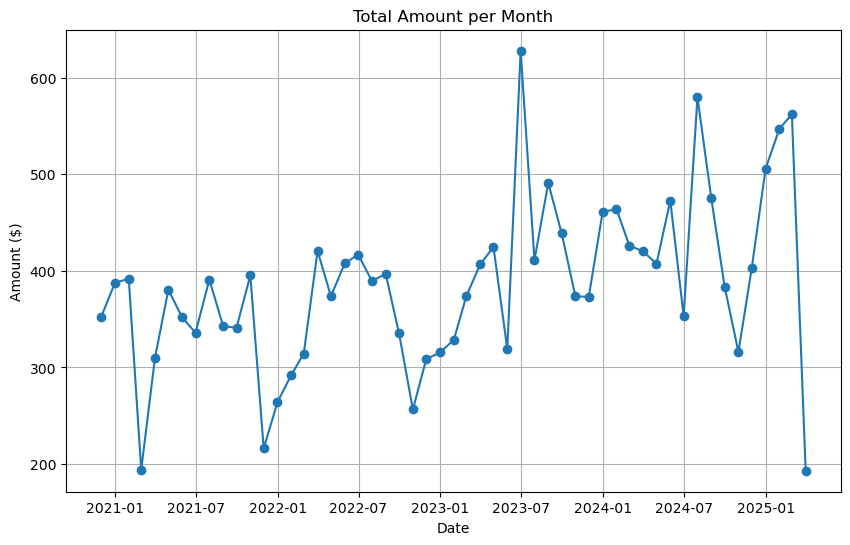

In [7]:
# plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_amount["Date"], monthly_amount["Amount"], marker="o")
plt.title("Total Amount per Month")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.grid(True)
plt.show()

In [8]:
# plot
fig = px.bar(
    monthly_amount,
    x="Date",
    y="Amount",
    title="Total Amount per Month and Year",
    labels={"Date": "Month and Year", "Amount": "Amount ($)"},
)

# format y-axis to show currency
fig.update_traces(hovertemplate="Month and Year: %{x}<br>Amount: $%{y:.2f}")

fig.show()

In [9]:
# line plot
fig = px.line(
    monthly_amount,
    x="Date",
    y="Amount",
    title="Total Amount per Month and Year",
    labels={"Date": "Month and Year", "Amount": "Amount ($)"},
)

# format y-axis to show currency
fig.update_traces(hovertemplate="Month and Year: %{x}<br>Amount: $%{y:.2f}")

fig.show()

In [10]:
# df.Expense.unique()

Note the Pepco / CleanChoice data. After this, they'll be consolidated into "Electric"

In [11]:
# group by year, month, and expense type, then sum Amount
monthly_expense_amount = (
    df.groupby([df["Date"].dt.to_period("M"), "Expense"])["Amount"].sum().reset_index()
)
monthly_expense_amount["Date"] = monthly_expense_amount["Date"].astype(
    str
)  # convert to string for Plotly

# plot
fig = px.line(
    monthly_expense_amount,
    x="Date",
    y="Amount",
    color="Expense",
    title="Total Amount per Expense Type per Month, CleanChoice & Pepco",
    labels={
        "Date": "Month and Year",
        "Amount": "Amount ($)",
        "Expense": "Expense Type",
    },
    hover_data={"Expense": True},
)

# format y-axis to show currency
fig.update_traces(
    hovertemplate="Month and Year: %{x}<br>Amount: $%{y:.2f}<br>Expense Type: %{customdata}"
)

fig.show()

In [12]:
# change "Pepco" and "CleanChoice" to "Electric" in the Expense column
df.loc[
    (df["Expense"] == "Pepco") | (df["Expense"] == "CleanChoice"), "Expense"
] = "Electric"
# df.Expense.unique()

In [13]:
# group by year, month, and expense type, then sum Amount
monthly_expense_amount = (
    df.groupby([df["Date"].dt.to_period("M"), "Expense"])["Amount"].sum().reset_index()
)
monthly_expense_amount["Date"] = monthly_expense_amount["Date"].astype(
    str
)  # convert to string for Plotly

# plot
fig = px.line(
    monthly_expense_amount,
    x="Date",
    y="Amount",
    color="Expense",
    title="Total Amount per Expense Type per Month",
    labels={
        "Date": "Month and Year",
        "Amount": "Amount ($)",
        "Expense": "Expense Type",
    },
    hover_data={"Expense": True},
)

# format y-axis to show currency
fig.update_traces(
    hovertemplate="Month and Year: %{x}<br>Amount: $%{y:.2f}<br>Expense Type: %{customdata}"
)

fig.show()

In [14]:
# group by year and month, sum Amount
monthly_amount = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum().reset_index()
monthly_amount["Date"] = monthly_amount["Date"].astype(
    str
)  # convert to string for Plotly

# calculate amount per person
monthly_amount["Amount_per_person"] = monthly_amount["Amount"] / 3

# plot
fig = px.line(
    monthly_amount,
    x="Date",
    y="Amount_per_person",
    title="Total Amount per Person per Month",
    labels={"Date": "Month and Year", "Amount_per_person": "Amount per Person ($)"},
)

# format y-axis to show currency
fig.update_traces(hovertemplate="Month and Year: %{x}<br>Amount per Person: $%{y:.2f}")
fig.show()

In [15]:
# group by year and month, sum Amount
monthly_amount = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum().reset_index()
monthly_amount["Date"] = monthly_amount["Date"].astype(
    str
)  # convert to string for Plotly

# calculate amount per person
monthly_amount["Amount_per_person"] = monthly_amount["Amount"] / 3

# plot
fig = px.bar(
    monthly_amount,
    x="Date",
    y="Amount_per_person",
    title="Total Amount per Person per Month",
    labels={"Date": "Month and Year", "Amount_per_person": "Amount per Person ($)"},
)

# format y-axis to show currency
fig.update_traces(hovertemplate="Month and Year: %{x}<br>Amount per Person: $%{y:.2f}")
fig.show()

In [16]:
monthly_amount.describe()

,Amount,Amount_per_person
count,53.000000,53.000000
mean,385.342453,128.447484
std,88.659247,29.553082
min,192.990000,64.330000
25%,335.200000,111.733333
50%,387.540000,129.180000
75%,420.660000,140.220000
max,628.080000,209.360000


In [17]:
# group by Year and Month, then sum Amount
monthly_amount = df.groupby(["Year", "Month"])["Amount"].sum().reset_index()

# calculate amount per person
monthly_amount["Amount_per_person"] = monthly_amount["Amount"] / 3

# plot
fig = px.line(
    monthly_amount,
    x="Month",
    y="Amount_per_person",
    color="Year",
    title="Total Amount per Person per Month by Year",
    labels={
        "Month": "Month",
        "Amount_per_person": "Amount per Person ($)",
        "Year": "Year",
    },
)

# update x-axis to show month names
fig.update_layout(
    xaxis=dict(
        tickmode="array",
        tickvals=list(range(1, 13)),
        ticktext=[
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec",
        ],
    )
)

# format y-axis to show currency
fig.update_traces(hovertemplate="Month: %{x}<br>Amount per Person: $%{y:.2f}")

fig.show()

In [18]:
# group by year and month, sum Amount
monthly_amount = df.groupby(["Year", "Month"])["Amount"].sum().reset_index()

# pivot
monthly_amount_pivot = monthly_amount.pivot(
    index="Month", columns="Year", values="Amount"
)

<Figure size 1000x600 with 0 Axes>

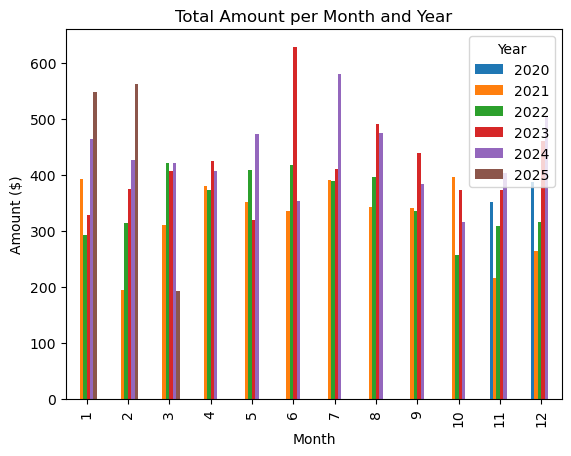

In [19]:
# plot
plt.figure(figsize=(10, 6))
monthly_amount_pivot.plot(kind="bar")
plt.title("Total Amount per Month and Year")
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.legend(title="Year")
plt.show()

In [20]:
# convert to Plotly format
monthly_amount_pivot = monthly_amount_pivot.reset_index()

# create traces, one for each year
traces = []
for year in monthly_amount_pivot.columns[1:]:
    traces.append(
        go.Bar(
            x=monthly_amount_pivot["Month"],
            y=monthly_amount_pivot[year],
            name=str(year),
            hovertemplate="Month: %{x}<br>Amount: $%{y:.2f}<br>Year: " + str(year),
        )
    )

# create fig
fig = go.Figure(data=traces)

# update layout
fig.update_layout(
    barmode="group",
    title="Total Amount per Month and Year",
    xaxis=dict(
        tickmode="array",
        tickvals=list(range(1, 13)),
        ticktext=[
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec",
        ],
        title="Month",
    ),
    yaxis=dict(title="Amount ($)"),
    legend_title_text="Year",
)

# plot
fig.show()

In [21]:
# group by year and month, sum Amount
monthly_amount = df.groupby(["Year", "Month"])["Amount"].sum().reset_index()

# calculate amount per person
monthly_amount["Amount_per_person"] = monthly_amount["Amount"] / 3

# pivot
monthly_amount_pivot = monthly_amount.pivot(
    index="Month", columns="Year", values="Amount_per_person"
)

# convert to Plotly format
monthly_amount_pivot = monthly_amount_pivot.reset_index()

# create traces, one for each year
traces = []
for year in monthly_amount_pivot.columns[1:]:
    traces.append(
        go.Bar(
            x=monthly_amount_pivot["Month"],
            y=monthly_amount_pivot[year],
            name=str(year),
            hovertemplate="Month: %{x}<br>Amount per Person: $%{y:.2f}<br>Year: "
            + str(year),
        )
    )

# create fig
fig = go.Figure(data=traces)

# update layout
fig.update_layout(
    barmode="group",
    title="Total Amount per Person per Month and Year",
    xaxis=dict(
        tickmode="array",
        tickvals=list(range(1, 13)),
        ticktext=[
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec",
        ],
        title="Month",
    ),
    yaxis=dict(title="Amount per Person ($)"),
    legend_title_text="Year",
)

# plot
fig.show()

In [22]:
# group by year, month, and expense type, then sum Amount
monthly_expense_amount = (
    df.groupby(["Year", "Month", "Expense"])["Amount"].sum().reset_index()
)

# calculate amount per person
monthly_expense_amount["Amount_per_person"] = monthly_expense_amount["Amount"] / 3

# pivot
monthly_expense_pivot = monthly_expense_amount.pivot_table(
    index=["Year", "Month"], columns="Expense", values="Amount_per_person", fill_value=0
)

# reorder expense columns
expense_order = ["Gas", "Internet", "Cleaning", "Electric"]
monthly_expense_pivot = monthly_expense_pivot[expense_order]

# convert pivoted DataFrame to a format suitable for Plotly
monthly_expense_pivot = monthly_expense_pivot.reset_index()

# create traces, one for each expense type
traces = []
for expense in monthly_expense_pivot.columns[2:]:
    traces.append(
        go.Bar(
            x=monthly_expense_pivot["Month"],
            y=monthly_expense_pivot[expense],
            name=expense,
            hovertemplate="Month: %{x}<br>Amount per Person: $%{y:.2f}<br>Expense: "
            + expense,
        )
    )

# create fig
fig = go.Figure(data=traces)

# update layout
fig.update_layout(
    barmode="stack",
    title="Total Amount per Person per Month and Year by Expense",
    xaxis=dict(
        tickmode="array",
        tickvals=list(range(1, 13)),
        ticktext=[
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec",
        ],
        title="Month",
    ),
    yaxis=dict(title="Amount per Person ($)"),
    legend_title_text="Expense",
)

# plot
fig.show()

In [23]:
# group by Date and Expense, then sum Amount
monthly_expense = df.groupby(["Date", "Expense"])["Amount"].sum().reset_index()

# calculate amount per person
monthly_expense["Amount_per_person"] = monthly_expense["Amount"] / 3

# define stacking order
expense_order = ["Gas", "Internet", "Cleaning", "Electric"]

# create traces for each expense type
traces = []
for expense in expense_order:
    filtered_data = monthly_expense[monthly_expense["Expense"] == expense]
    traces.append(
        go.Bar(
            x=filtered_data["Date"],
            y=filtered_data["Amount_per_person"],
            name=expense,
            hovertemplate="Date: %{x}<br>Expense: "
            + expense
            + "<br>Amount per Person: $%{y:.2f}",
        )
    )

# create figure
fig = go.Figure(data=traces)

# update layout
fig.update_layout(
    barmode="stack",  # stack expenses within each date bar
    title="Total Amount per Person Over Time (Stacked by Expense)",
    xaxis=dict(
        title="Date", tickformat="%b %Y", tickangle=-45  # display month and year
    ),
    yaxis=dict(title="Amount per Person ($)"),
    legend_title_text="Expense",
)

# plot
fig.show()

In [24]:
# define default Plotly colors for each expense type
expense_colors = {
    "Gas": "#636EFA",  # blue
    "Internet": "#EF553B",  # red
    "Cleaning": "#00CC96",  # green
    "Electric": "#AB63FA",  # purple
}

# set y-axis range for all individual expense plots
yaxis_range = [0, max(monthly_expense["Amount_per_person"])]

In [25]:
# plot individual expense types with the extracted colors
for expense in expense_order:
    filtered_data = (
        df[df["Expense"] == expense].groupby("Date")["Amount"].sum().reset_index()
    )
    filtered_data["Amount_per_person"] = filtered_data["Amount"] / 3

    fig_expense = go.Figure()
    fig_expense.add_trace(
        go.Scatter(
            x=filtered_data["Date"],
            y=filtered_data["Amount_per_person"],
            mode="lines+markers",
            name=expense,
            marker=dict(color=expense_colors[expense]),  # Use the extracted color
            hovertemplate="Date: %{x}<br>Amount per Person: $%{y:.2f}",
        )
    )

    fig_expense.update_layout(
        title=f"{expense} Expense Over Time per Person (Line Plot)",
        xaxis=dict(title="Date", tickformat="%b %Y", tickangle=-45),
        yaxis=dict(title="Amount per Person ($)", range=yaxis_range),
    )

    # show the individual expense plot
    fig_expense.show()

In [26]:
# filter Electric
electric_expense = (
    df[df["Expense"] == "Electric"].groupby("Date")["Amount"].sum().reset_index()
)

# calculate amount per person
electric_expense["Amount_per_person"] = electric_expense["Amount"] / 3

# plot
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=electric_expense["Date"],
        y=electric_expense["Amount_per_person"],
        name="Electric",
        marker=dict(color=expense_colors["Electric"]),
        hovertemplate="Date: %{x}<br>Amount per Person: $%{y:.2f}",
    )
)

fig.update_layout(
    title="Electric Expense per Person Over Time (Bar Plot)",
    xaxis=dict(title="Date", tickformat="%b %Y", tickangle=-45),
    yaxis=dict(title="Amount per Person ($)", range=yaxis_range),
)

fig.show()

In [27]:
# filter Cleaning
cleaning_expense = (
    df[df["Expense"] == "Cleaning"].groupby("Date")["Amount"].sum().reset_index()
)

# calculate amount per person
cleaning_expense["Amount_per_person"] = cleaning_expense["Amount"] / 3

# plot
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=cleaning_expense["Date"],
        y=cleaning_expense["Amount_per_person"],
        name="Cleaning",
        marker=dict(color=expense_colors["Cleaning"]),
        hovertemplate="Date: %{x}<br>Amount per Person: $%{y:.2f}",
    )
)

fig.update_layout(
    title="Cleaning Expense per Person Over Time (Bar Plot)",
    xaxis=dict(title="Date", tickformat="%b %Y", tickangle=-45),
    yaxis=dict(title="Amount per Person ($)", range=yaxis_range),
)

fig.show()

In [28]:
# filter Internet
internet_expense = (
    df[df["Expense"] == "Internet"].groupby("Date")["Amount"].sum().reset_index()
)

# calculate amount per person
internet_expense["Amount_per_person"] = internet_expense["Amount"] / 3

# plot
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=internet_expense["Date"],
        y=internet_expense["Amount_per_person"],
        name="Internet",
        marker=dict(color=expense_colors["Internet"]),
        hovertemplate="Date: %{x}<br>Amount per Person: $%{y:.2f}",
    )
)

fig.update_layout(
    title="Internet Expense per Person Over Time (Bar Plot)",
    xaxis=dict(title="Date", tickformat="%b %Y", tickangle=-45),
    yaxis=dict(title="Amount per Person ($)", range=yaxis_range),
)

fig.show()

In [29]:
# filter Gas
gas_expense = df[df["Expense"] == "Gas"].groupby("Date")["Amount"].sum().reset_index()

# calculate amount per person
gas_expense["Amount_per_person"] = gas_expense["Amount"] / 3

# plot
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=gas_expense["Date"],
        y=gas_expense["Amount_per_person"],
        name="Gas",
        marker=dict(color=expense_colors["Gas"]),
        hovertemplate="Date: %{x}<br>Amount per Person: $%{y:.2f}",
    )
)

fig.update_layout(
    title="Gas Expense per Person Over Time (Bar Plot)",
    xaxis=dict(title="Date", tickformat="%b %Y", tickangle=-45),
    yaxis=dict(title="Amount per Person ($)", range=yaxis_range),
)

fig.show()